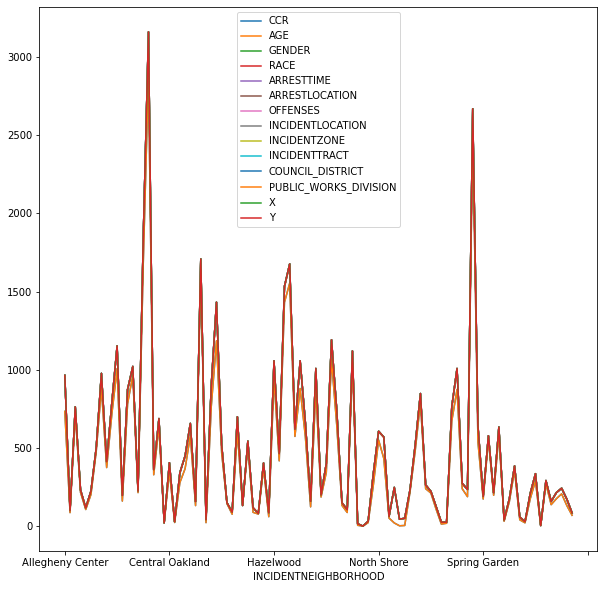

In [18]:
import csv

import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv("arrests.csv", index_col = "PK")


data_plot = data.groupby("INCIDENTNEIGHBORHOOD").count()

data_plot.plot(figsize=(10,10))

#pivoted_data = data.pivot(columns="INCIDENTNEIGHBORHOOD")

#pivoted_data.plot(figsize=(10,10))



#Create a dictionary to store the arrests
#neighborhood_counter = dict()

# loop over the data
#for row in arrests[1:]:
#    neighborhood = row[5]
    
    # check to see if the center is already in the dictionary
#    if neighborhood not in neighborhoo_counter:
        # create a new entry
#        center_counter[center] = 1
#    else:
        # increment a new entry
#        neighborhood_counter[neighborhood] = neighborhood_counter[neighborhood] + 1

        
